In [1]:
from random import randint
import datetime
import time

In [2]:
def waktu(ud):
    return datetime.datetime.fromtimestamp(ud+1).strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
#cerah siram
d = datetime.datetime(2023, 4, 1, 11, 20)
ud = time.mktime(d.timetuple())
data = []
humid = 40
temp = 38.04
light = 45021
ahumid = 54
atemp = 33
n = 1800
xmin = 40
xmax = 98
m = (xmax-xmin)/(n*0.6)
print(m)

In [32]:
#cerah mengering
d = datetime.datetime(2023, 4, 1, 12, 15)
ud = time.mktime(d.timetuple())
data = []
humid = 98
temp = 32.04
light = 45021
ahumid = 67
atemp = 32
n = 7200
xmin = 40
xmax = 98
m = (xmax-xmin)/(n*0.5)
print(m)

0.01611111111111111


In [14]:
#mendung1
d = datetime.datetime(2023, 4, 3, 10, 45)
ud = time.mktime(d.timetuple())
data = []
humid = 44
temp = 35.11
light = 16780
ahumid = 46
atemp = 32
n = 1800
xmin = 44
xmax = 98
m = (xmax-xmin)/(n*0.4)
print(m)

0.075


In [ ]:
#Siram cerah
for i in range(0,n):
    if humid < xmax:
        poss = randint(0,6)
        if poss > 0:
            humid += m
    if temp > 32:
        temp = temp-((int(humid))/50000)
    else:
        temp = temp+(randint(0,1))/100
    ahumid += ((int(humid))/5000)
    if ahumid >= 67: ahumid = 67-randint(0,2)
    atemp = atemp-((int(humid))/50000)
    if atemp <= 32: atemp = 32+(randint(0,1))/100
    light += randint(-2,2)
    ud += 1
    data.append([waktu(ud),int(humid),temp,int(ahumid),atemp,light,'siram'])

In [15]:
#Siram mendung
for i in range(0,n):
    if humid < xmax:
        poss = randint(0,6)
        if poss > 0:
            humid += m
    if temp > 28:
        temp = temp-((int(humid))/50000)
    else:
        temp = temp+(randint(0,1))/100
    ahumid += ((int(humid))/5000)
    if ahumid >= 67: ahumid = 67-randint(0,2)
    atemp = atemp-((int(humid))/50000)
    if atemp <= 29: atemp = 29+(randint(0,1))/100
    light += randint(-2,2)
    ud += 1
    data.append([waktu(ud),int(humid),temp,int(ahumid),atemp,light,'siram'])

In [33]:
#mengering cerah
for i in range(0,n):
    if humid > xmin:
        if randint(0,10) > 6:
            humid -= m
    if temp < 45:
        temp = temp+((int(humid))/50000)
    else:
        temp = temp-(randint(0,1))/100
    ahumid += ((int(humid))/5000)
    if ahumid > 56: ahumid = 56-randint(0,2)
    atemp = atemp+((int(humid))/50000)
    if atemp >= 33: atemp = 33-(randint(0,1))/100
    light += randint(-1,1)
    ud += 1
    data.append([waktu(ud),int(humid),temp,int(ahumid),atemp,light,'mengering'])

In [ ]:
#jeda
for i in range(0,7200):
    if humid > 20:
        poss = randint(0,40)
        if poss == 1:
            humid = humid-1
    if temp < 50:
        temp = temp+(randint(0,1)/1000)
    ahumid += randint(-1,1)
    if ahumid < 40: ahumid = 40
    if ahumid > 50: ahumid = 50
    if randint(0,100) == 1:
        atemp += randint(-1,2)
    if atemp < 30: atemp = 30
    if atemp > 34: atemp = 34
    light += randint(-1,1)
    ud += 1
    data.append([waktu(ud),humid,temp,ahumid,atemp,light,'jeda'])

In [ ]:
data

In [ ]:
len(data)

In [5]:
import pandas as pd

In [34]:
df = pd.DataFrame(data,columns=['date','humidity','temperature','ambient humidity','ambient temperature','light','status'])

In [ ]:
df

In [ ]:
df.describe()

In [24]:
df.to_csv('sirammendung.csv')

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

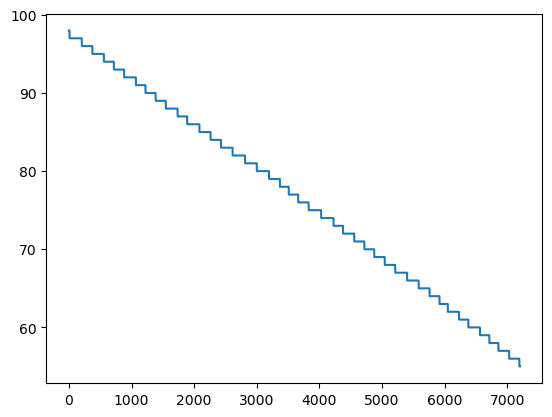

In [35]:
plt.figure()
df['humidity'].plot()

<Axes: >

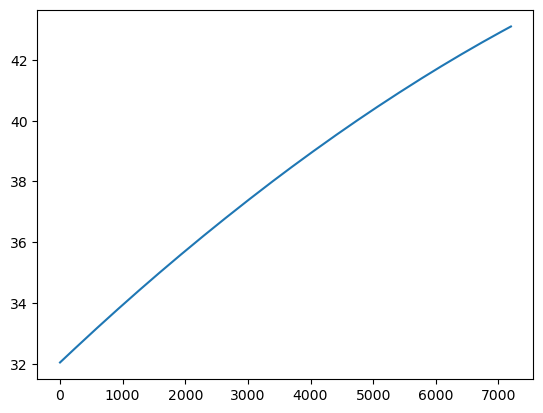

In [36]:
plt.figure()
df['temperature'].plot()

<Axes: >

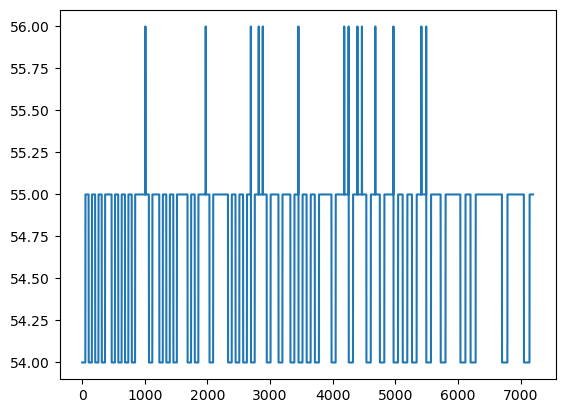

In [37]:
plt.figure()
df['ambient humidity'].plot()

<Axes: >

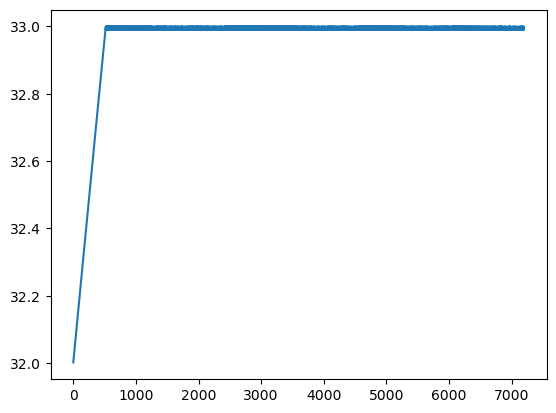

In [38]:
plt.figure()
df['ambient temperature'].plot()

<Axes: >

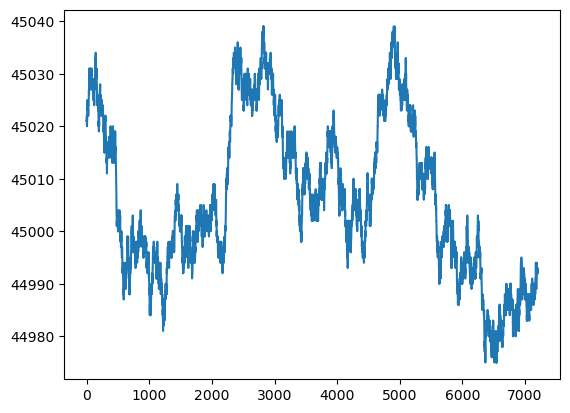

In [31]:
plt.figure()
df['light'].plot()